# Hand Gestures Detection and Recognition Building System for Stroke Patients using Supervised Neural Networks

## introduction

A sign language is a language which, uses manual communication and body language to convey meaning.
This can include combining hand shapes, orientation and movement of the hands, arms or body, and
facial expressions to fluidly express a speaker's thoughts .So ,its important language for Persons
with disabilities .Patients monitoring techniqueuses image processing and computer vision to produce
understanding sign .It keep track of various hands parameters and provides data to analysis it and 
monitor system. It is depend on gestures language Interpreter of the patients (i.e  interaction  descriptor ).
This utility system have  general facility due to its depend on monitoring the patients in different regions.
If a patient ask to eat or something else , the system helps him to achieve what he wants, even if 
this request out of reach .It is used to express of patient wishes  . This method is the easiest
way to help the patients and what they need , when the patient unable to walk due to stroke,
and what feeling in complete paralysis, except his hands.Then the system completely depend on hands
movements.The details of system consist of digital camera connects with active system to monitor
closely the SP.The idea of the system is to monitor the patient's hands. Basically, the movement of
the patient will be interpreted and compared with the database , depend on special movement build in 
the system.The system reject any gestures not  exist (contrary to the rules). The error message are
displayed when the patient's gesture is out of system rules. 

## importing basic libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## importing libraries for neural network

In [5]:
#importing libraries for taking input as image  
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
# importing CNN layers
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,Sequential
from keras.layers import Activation
# importing transfer learning techniques
from keras.applications.vgg16 import VGG16





In [6]:
# location of the data folder
train_data='hand gesture/train'
test_data='hand gesture/test'

In [7]:
# sefining image data generator
train_datagen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,shear_range=.2,zoom_range=.2)
test_datagen=ImageDataGenerator(rescale=1/255)

In [8]:
#taking data from folder
train_generator=train_datagen.flow_from_directory(train_data,target_size=(224,224),class_mode='categorical',shuffle=True,batch_size=32)
test_generator=test_datagen.flow_from_directory(test_data,target_size=(224,224),class_mode='categorical',shuffle=False,batch_size=32)


Found 2098 images belonging to 7 classes.
Found 527 images belonging to 7 classes.


In [9]:
#labels of the target
label=train_generator.class_indices
label

{'Request Doctor': 0,
 'Request Food': 1,
 'Request Help': 2,
 'Request Tea': 3,
 'Request W.C': 4,
 'Request Water': 5,
 'nothing': 6}

In [10]:
#making Dictionary for output
labels={0:'Request Doctor',1:'Request Food',2:'Request Help',3:'Request Tea',4:'Request W.C',5:'Request Water',6:'nothing'}

## model using CNN layers


### we can also use the given model intead of transfer learning but it will not give that much accuracy as compared to transfer learning 

In [11]:



# model=Sequential()

# model.add(Conv2D(200,(3,3),input_shape=(224,224,1)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# #The first CNN layer followed by Relu and MaxPooling layers

# model.add(Conv2D(100,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# #The second convolution layer followed by Relu and MaxPooling layers

# model.add(Flatten())
# model.add(Dropout(0.5))
# #Flatten layer to stack the output convolutions from second convolution layer
# model.add(Dense(50,activation='relu'))
# #Dense layer of 64 neurons
# model.add(Dense(6,activation='softmax'))
# #The Final layer with two outputs for two categories

# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## model using transfer learning

In [12]:
#model using transfer learning
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in vgg.layers:
    layer.trainable=False
x=Flatten()(vgg.output)
x=Dense(50,activation='relu')(x)
final=Dense(7,activation='softmax')(x)
model1=Model(inputs=vgg.input,outputs=final)
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#fitting the model
hist1=model1.fit_generator(train_generator,epochs=5,steps_per_epoch=len(train_generator),validation_data=test_generator,validation_steps=len(test_generator))

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
66/66 [==============================] - 1630s 25s/step - loss: 0.3717 - acc: 0.8845 - val_loss: 0.0808 - val_acc: 0.9753
Epoch 2/5
66/66 [==============================] - 1610s 24s/step - loss: 0.0495 - acc: 0.9825 - val_loss: 0.2314 - val_acc: 0.9412
Epoch 3/5
66/66 [==============================] - 1605s 24s/step - loss: 0.0149 - acc: 0.9981 - val_loss: 0.1051 - val_acc: 0.9639
Epoch 4/5
66/66 [==============================] - 1603s 24s/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.2270 - val_acc: 0.9488
Epoch 5/5
66/66 [==============================] - 1604s 24s/step - loss: 0.0072 - acc: 0.9991 - val_loss: 0.1906 - val_acc: 0.9526


In [14]:
model1.save('hand_gesture.h5')

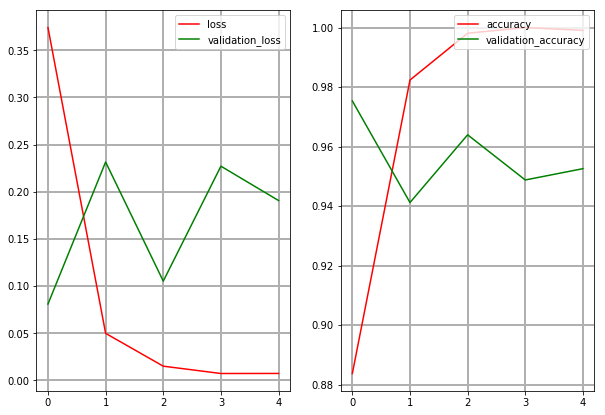

In [15]:
#data_visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(hist1.history['loss'],'r',label='loss')
plt.plot(hist1.history['val_loss'],'g',label='validation_loss')
plt.legend()
plt.grid(linewidth=2)
plt.subplot(1,2,2)
plt.plot(hist1.history['acc'],'r',label='accuracy')
plt.plot(hist1.history['val_acc'],'g',label='validation_accuracy')
plt.legend(loc=1)
plt.grid(linewidth=2)


## live camera or practical implementation

In [16]:
#function for detecting the image from the live camera
def detect(frame): 
    cv.rectangle(frame,(100,100),(300,400),(0,255,0),2)
    crop=frame[100:400,100:300]
    blur=cv.GaussianBlur(crop,(3,3),-1)
    ## to convert the image to hsv
    
    resized=cv.resize(blur,(224,224))
    resized=resized/255.0
    resized=np.expand_dims(resized,axis=0)
    pred=model1.predict(resized)
    prediction=np.argmax(pred,axis=1)[0]
    pct=str(int(np.max(pred,axis=1)[0]*100))
    cv.putText(frame,labels[prediction]+pct+'%',(100,90),cv.FONT_HERSHEY_SIMPLEX,.8,(0,255,0),2)
    cv.imshow('frame',frame)
     
    return blur
    

In [17]:
#live camera for detection
c=cv.VideoCapture(0)
while True:
    ret,frame=c.read()
    cv.imshow('aj',detect(frame))
    if cv.waitKey(1)==13:
        break
cv.destroyAllWindows()


In [18]:
# detection with threshold images for better shape detection

In [18]:
#function for detecting the image from the live camera with threshold images 
def detect(frame): 
    cv.rectangle(frame,(100,100),(300,400),(0,255,0),2)
    crop=frame[100:400,100:300]
    blur=cv.GaussianBlur(crop,(3,3),-1)
    ## to convert the image to hsv
    hsv=cv.cvtColor(blur,cv.COLOR_BGR2HSV)
    ret,thres=cv.threshold(hsv,127,255,0)
    resized=cv.resize(thres,(224,224))
    resized=resized/255.0
    resized=np.expand_dims(resized,axis=0)
    pred=model1.predict(resized)
    prediction=np.argmax(pred,axis=1)[0]
    pct=str(int(np.max(pred,axis=1)[0]*100))
    cv.putText(frame,labels[prediction]+pct+'%',(100,90),cv.FONT_HERSHEY_SIMPLEX,.8,(0,255,0),2)
    cv.imshow('frame',frame)
     
    return thres
    

In [19]:
#live camera for detection
c=cv.VideoCapture(0)
while True:
    ret,frame=c.read()
    cv.imshow('aj',detect(frame))
    if cv.waitKey(1)==13:
        break
cv.destroyAllWindows()
